In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from powerlaw import Fit

In [6]:
path = "../data/out.csv"
G = nx.read_edgelist(path, delimiter=',')

```EDA```

In [7]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Average_Clustering_Coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {Average_Clustering_Coefficient}")

Average_Shortest_Path = nx.average_shortest_path_length(G)
print(f"Average_Shortest_Path: {Average_Shortest_Path}")

Diameter = nx.diameter(G)
print(f"Diameter: {Diameter}")


Number of nodes: 4941
Number of edges: 6594
Average Clustering Coefficient: 0.08010361108159714
Average_Shortest_Path: 18.989185424445708
Diameter: 46


```Degree/Betweenness/Closeness Centrality```

In [8]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

critical_nodes_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
critical_nodes_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]
critical_nodes_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:10]

print(f"Nodes with highest degree centrality: {critical_nodes_degree}")
print(f"Nodes with highest betweeness centrality: {critical_nodes_betweenness}")
print(f"Nodes with highest closeness centrality: {critical_nodes_closeness}")

Nodes with highest degree centrality: ['2847', '602', '932', '3411', '4436', '558', '2287', '2926', '2865', '3930']
Nodes with highest betweeness centrality: ['651', '559', '1365', '2824', '2685', '1324', '1378', '1213', '433', '2781']
Nodes with highest closeness centrality: ['1378', '1678', '2944', '1377', '2781', '1365', '1368', '1380', '2685', '2795']


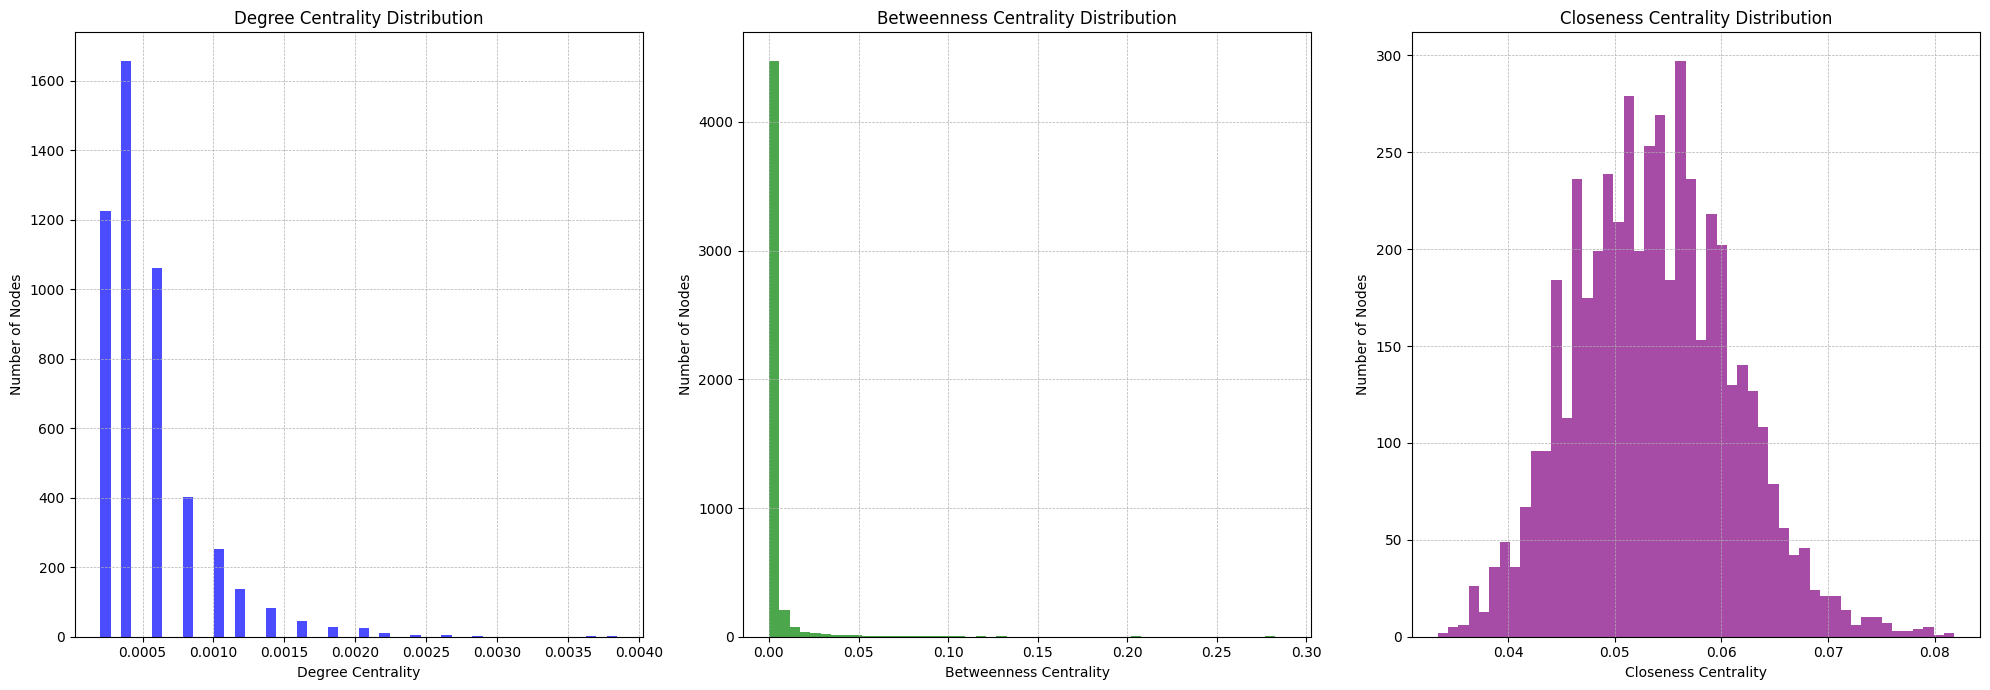

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
values = list(degree_centrality.values())

# Degree centrality
ax[0].hist(values, bins=50, color='blue', alpha=0.7)
ax[0].set_title("Degree Centrality Distribution")
ax[0].set_xlabel("Degree Centrality")
ax[0].set_ylabel("Number of Nodes")
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Betweenness centrality
ax[1].hist(list(betweenness_centrality.values()), bins=50, color='green', alpha=0.7)
ax[1].set_title("Betweenness Centrality Distribution")
ax[1].set_xlabel("Betweenness Centrality")
ax[1].set_ylabel("Number of Nodes")
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Betweenness centrality
ax[2].hist(list(closeness_centrality.values()), bins=50, color='purple', alpha=0.7)
ax[2].set_title("Closeness Centrality Distribution")
ax[2].set_xlabel("Closeness Centrality")
ax[2].set_ylabel("Number of Nodes")
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

```Degree distribution```

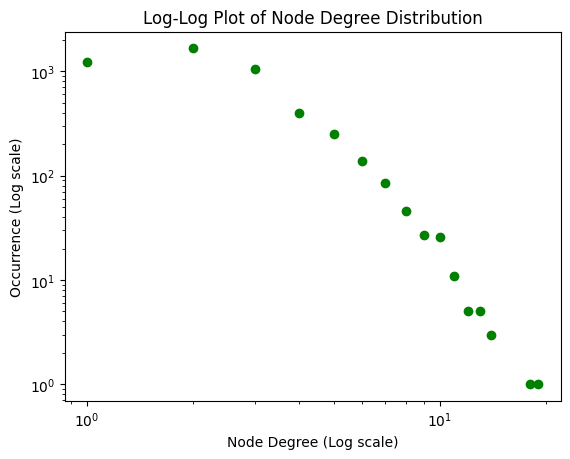

In [13]:
# Gather node degrees from the network into a list
node_degrees = [deg for n, deg in G.degree()]

# Tally the occurrences of each degree in the list
degree_frequency = Counter(node_degrees)
deg_vals, freq_vals = zip(*degree_frequency.items())

# Plot degree distribution using a scatter approach on a log-log scale
plt.scatter(deg_vals, freq_vals, color='green')

# Apply logarithmic scaling to axes for better visualization of power-law distribution
plt.xscale('log')
plt.yscale('log')

# Labeling axes and applying a title to the graph
plt.xlabel('Node Degree (Log scale)')
plt.ylabel('Occurrence (Log scale)')
plt.title('Log-Log Plot of Node Degree Distribution')

# Display the resulting plot
plt.show()


```Normalizing the degree distribution or converting raw frequency counts to probabilities```

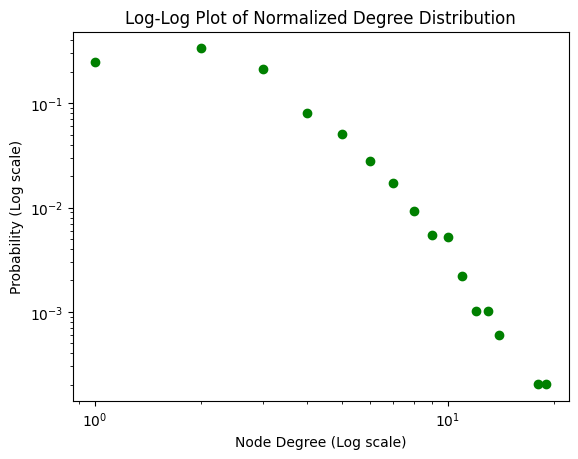

In [14]:
# Gather node degrees from the network into a list
node_degrees = [deg for n, deg in G.degree()]

# Calculate the normalized frequency of each degree value
degree_frequency = Counter(node_degrees)
deg_vals, freq_vals = zip(*degree_frequency.items())

# Normalize frequencies by the total number of nodes to get the probabilities
total_nodes = float(sum(freq_vals))
prob_vals = [f / total_nodes for f in freq_vals]

# Plot the normalized degree distribution on a log-log scale
plt.scatter(deg_vals, prob_vals, color='green')

# Set logarithmic scale for better visualization of power-law distribution
plt.xscale('log')
plt.yscale('log')

# Label the axes and title the plot
plt.xlabel('Node Degree (Log scale)')
plt.ylabel('Probability (Log scale)')
plt.title('Log-Log Plot of Normalized Degree Distribution')

# Display the plot
plt.show()



```Power-Law Fit of Network Degree Distribution```


Calculating best minimal value for power law fit


<Axes: >

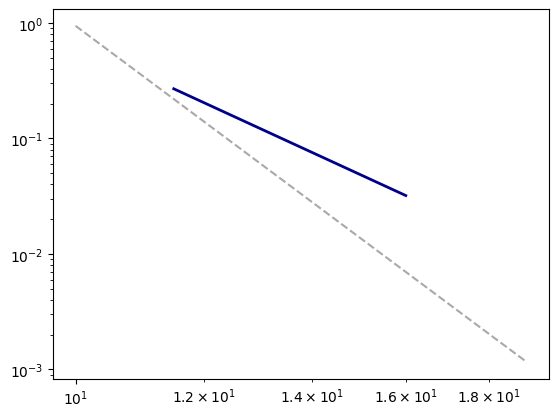

In [17]:
# Arrange node degrees in descending order to prepare for analysis
sorted_degrees = sorted((degree for _, degree in G.degree()), reverse=True)

# Apply power-law fit to the sorted list of degrees
degree_distribution_fit = Fit(sorted_degrees)

# Generate and plot the PDF of the degree distribution
pdf_plot = degree_distribution_fit.plot_pdf(color='darkblue', linewidth=2)

# Overlay the theoretical power-law PDF for comparison
degree_distribution_fit.power_law.plot_pdf(color='darkgrey', linestyle='--', ax=pdf_plot)



```Simulating Attacks or Failures```